In [1]:
import statsmodels

In [2]:
print(statsmodels.__version__)

0.13.2


In [3]:
import gc
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/df_daywise.csv')

In [5]:
df.head()

,Unnamed: 0,DateApproved,loans_approved
0,0,2020-04-03,10548
1,1,2020-04-04,18432
2,2,2020-04-05,21795
3,3,2020-04-06,31955
4,4,2020-04-07,43761


In [6]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [7]:
df.head()

,DateApproved,loans_approved
0,2020-04-03,10548
1,2020-04-04,18432
2,2020-04-05,21795
3,2020-04-06,31955
4,2020-04-07,43761


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DateApproved    244 non-null    object
 1   loans_approved  244 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [9]:
df.DateApproved = pd.to_datetime(df.DateApproved)

In [10]:
df.set_index('DateApproved',inplace = True)

In [11]:
df.head()

,loans_approved
DateApproved,
2020-04-03,10548
2020-04-04,18432
2020-04-05,21795
2020-04-06,31955
2020-04-07,43761


In [12]:
df.isnull().sum()

loans_approved    0
dtype: int64

In [13]:
df.shape

(244, 1)

In [14]:
df.describe()

,loans_approved
count,244.000000
mean,6427.836066
std,13162.414653
min,1.000000
25%,838.000000
50%,2577.500000
75%,5565.000000
max,107111.000000


In [15]:
gc.collect()

88

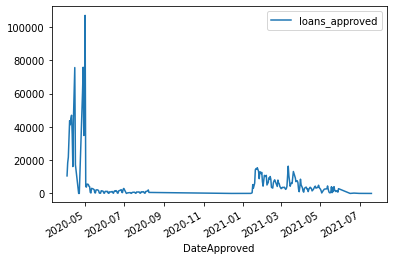

In [16]:
df.plot();

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

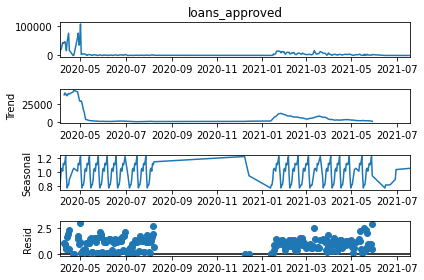

In [18]:
result=seasonal_decompose(df['loans_approved'], model='multiplicative', period=12)
result.plot()
plt.tight_layout()

In [19]:
col = sns.color_palette()
col

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [20]:
from statsmodels.tsa.stattools import adfuller
# rolling statistics
def stationary_check(data):
    mean = data.rolling(window=12).mean()
    std = data.rolling(window=12).std()
    plt.plot(data,color=col[0],label = 'Original Data');
    plt.plot(mean, color=col[1],label = 'mean');
    plt.plot(std, color=col[2],label = 'standard deviation');
    plt.title('Rolling Mean & Standard Deviation')
    plt.tight_layout()
    plt.show()
    
    # dickey-fuller test
    af = adfuller(data)
    op = pd.Series(af[0:4],index = ['Test Statistics','p-value','Lags used','No. of obs. used'])
    for key,value in af[4].items():
        op['Critical value (%s)'%key] = value
    print(op)

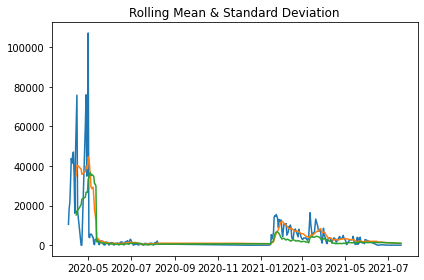

Test Statistics          -2.915453
p-value                   0.043580
Lags used                15.000000
No. of obs. used        228.000000
Critical value (1%)      -3.459361
Critical value (5%)      -2.874302
Critical value (10%)     -2.573571
dtype: float64


In [21]:
stationary_check(df.loans_approved)

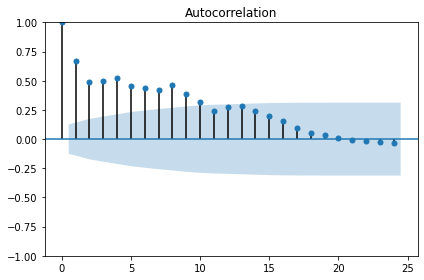

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['loans_approved'])
plt.tight_layout()

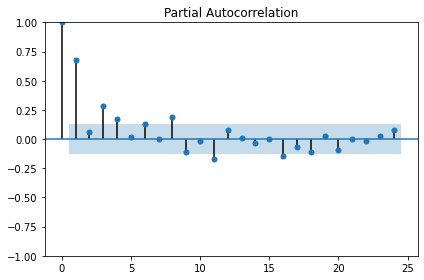

In [23]:
plot_pacf(df['loans_approved'])
plt.tight_layout()

In [24]:
import warnings

warnings.filterwarnings("ignore")

#### # ARIMA

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.loans_approved, order=(3,2,0))

In [26]:
model_fit = model.fit()

In [27]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         loans_approved   No. Observations:                  244
Model:                 ARIMA(3, 2, 0)   Log Likelihood               -2609.378
Date:                Sat, 01 Oct 2022   AIC                           5226.755
Time:                        15:02:54   BIC                           5240.711
Sample:                             0   HQIC                          5232.377
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8869      0.019    -46.788      0.000      -0.924      -0.850
ar.L2         -0.7703      0.023    -33.495      0.000      -0.815      -0.725
ar.L3         -0.4375      0.018    -24.084      0.0

In [28]:
gc.collect()

19153

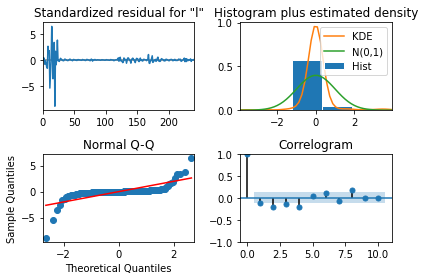

In [29]:
model_fit.plot_diagnostics()
plt.tight_layout()

In [30]:
#!pip install statsmodels==0.12.2

In [48]:
plt.figure(figsize=(10,8))
model_fit.plot_predict(dynamic=False)
plt.show()

In [33]:
gc.collect()

44

In [34]:
train = df[:195]
test = df[195:]

In [35]:
df.shape

(244, 1)

In [36]:
print(len(train))
print(len(test))
print(len(train)+len(test))

195
49
244


In [48]:
# Build Model
model = ARIMA(train, order=(2,2,1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(49, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


#### # SARIMAX

In [39]:
import pmdarima 

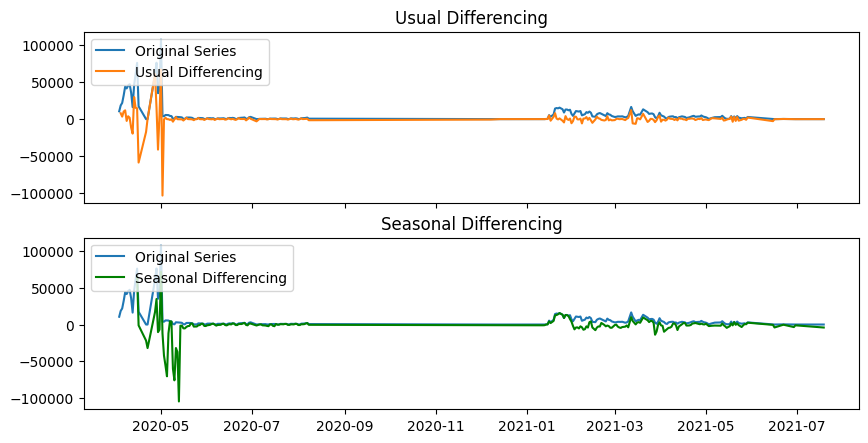

In [63]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df[:], label='Original Series')
axes[0].plot(df[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(df[:], label='Original Series')
axes[1].plot(df[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [41]:
smodel = pmdarima.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=4955.399, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5103.930, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5000.706, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4964.217, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5105.690, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=5039.448, Time=0.16 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=4957.398, Time=0.79 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=4956.093, Time=1.49 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=5000.872, Time=0.52 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=4950.742, Time=2.19 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=4951.168, Time=3.09 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=4949.484, Time=1.99 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=4956.183, Time=1.74 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=4957.431, Time=1.49 sec
 ARIMA(1,0,0)(2,1,1

In [42]:
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  244
Model:             SARIMAX(3, 0, 3)x(2, 1, [1], 12)   Log Likelihood               -2436.315
Date:                              Sat, 01 Oct 2022   AIC                           4892.630
Time:                                      15:06:22   BIC                           4927.097
Sample:                                           0   HQIC                          4906.530
                                              - 244                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3970      0.081     -4.893      0.000      -0.556      -0.238
ar.L2          0.8234      0.059     13.901      0.000       0.707       0.940
ar.L3          0.4454      0.070      6.360      0.000       0.308       0.583
ma.L1          0.9430      0.071     13.234      0.000       0.803       1.083
ma.L2         -0.4967      0.084     -5.940      0.000      -0.661      -0.333
ma.L3         -0.6546      0.038    -17.222      0.000      -0.729      -0.580
ar.S.L12      -0.1938      0.077     -2.525      0.012      -0.344      -0.043
ar.S.L24      -0.2466      0.055     -4.514      0.000      -0.354      -0.140
ma.S.L12      -0.7132      0.095     -7.513      0.000      -0.899      -0.527
sigma2       8.42e+07   1.15e-09   7.32e+16      0.000    8.42e+07    8.42e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):               795.82
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+32. Standard errors may be unstable.
"""

In [43]:
# crating the future dates
import datetime
a = pd.to_datetime('2021-08-01')
numdays = 31
futrue_dates = []
for x in range (0, numdays):
    futrue_dates.append(a + datetime.timedelta(days = x))

In [44]:
n_periods = 31
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = futrue_dates

In [45]:
# make series for plotting purpose
fitted_series = pd.Series(np.array(fitted), index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

Text(0.5, 1.0, 'Original Data')

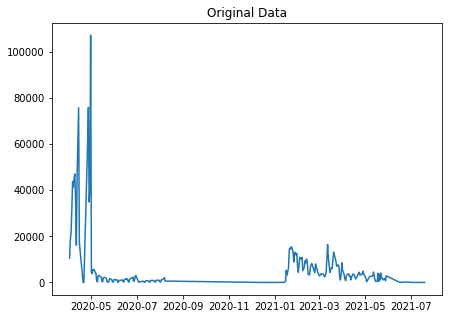

In [46]:
plt.figure(figsize=(7,5));
plt.plot(df);
plt.title('Original Data')

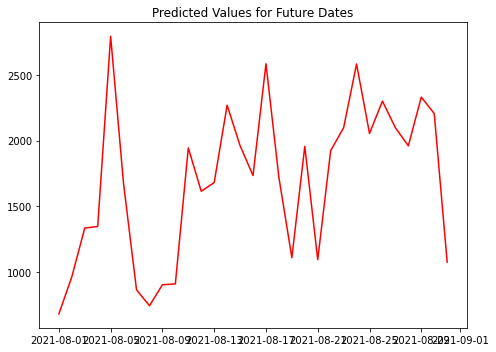

In [49]:
plt.figure(figsize=(7,5));
plt.plot(fitted_series, color='r');
plt.title('Predicted Values for Future Dates')
plt.tight_layout()

In [62]:
pd.DataFrame(fitted_series,columns={'loan_approved':fitted_series})

,loan_approved
2021-08-01,682.896167
2021-08-02,964.540811
2021-08-03,1335.613889
2021-08-04,1347.268413
2021-08-05,2792.883365
2021-08-06,1670.804460
2021-08-07,865.974676
2021-08-08,745.125943
2021-08-09,904.714318
2021-08-10,910.945360


In [ ]:
pd.DataFrame(columns = {''})